
# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup, fundada há 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
listings_buenos_aires = 'http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2022-09-22/visualisations/listings.csv'
df = pd.read_csv(listings_buenos_aires)

# tranformar a coluna price de notação científica para decimal

df.price = df.price.apply(lambda x: float(x))

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - O número de comentários que a listagem tem (nos últimos 12 meses)
* `license` - O número da licença/autorização/registro


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,9823.0,3,30,2022-07-17,0.24,1,314,3,NaN
1,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,María,NaN,Palermo,-34.58617,-58.41036,Entire home/apt,3728.0,7,98,2022-08-14,0.79,3,324,8,NaN
2,118877,Entire Studio/apt in Buenos Aires,600320,Roxana,NaN,Palermo,-34.57734,-58.43790,Entire home/apt,5687.0,2,24,2022-06-21,0.18,2,174,5,NaN
3,14711,SPECTACULAR ANCIENT HOUSE,57770,Cintia,NaN,San Nicolas,-34.60786,-58.37211,Entire home/apt,17370.0,1,0,NaN,NaN,1,365,0,NaN
4,120874,Great apt 1 Bedroom - 1.5 Bath /Recoleta,530261,Luciano,NaN,Recoleta,-34.58991,-58.39931,Entire home/apt,6514.0,14,10,2022-04-27,0.07,27,295,1,NaN



Verificarei a estrutura do Dataframe, verificando a quantidade de variáveis e entradas, como também, as variáveis categóricas e contínuas.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Neste dataset há " + str(df.shape[1]) + " variáveis e " + str(df.shape[0]) + " entradas. \n")
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Neste dataset há 18 variáveis e 17947 entradas. 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


Verifiquei que predominam as variáveis contínuas. As variáveis contínuas são quantitativas e tem alto poder de explicação. Nas variáveis categóricas, será importante analisar **o tipo de quarto que é oferecido(`room_type`)** e  **o nome do bairro(`neighbourhood`)**. Percebi que na variável categórica `last_review` está no formato de data, porém está no tipo object. Será necessária a mudança para o tipo **datetime**, para facilitar a sua manipulação.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Analisei os valores ausentes para entender se os valores nulos são significativos comparados ao total de entradas e verificar a qualidade do dataset.

É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
A variável `licence` possui aproximadamente 98% dos seus valores ausentes.
As variáveis `reviews_per_month` e `last_review` possuem aproximadamente 21% dos valores nulos.
A variável `name` tem aproximadamente 0,01% de valores ausentes.

As variáveis `neighbourhood_group`, `host_name` e `license` serão excluídas futuramente, pois não serão utilizadas nesta análise.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
license                           0.979774
reviews_per_month                 0.212125
last_review                       0.212125
name                              0.000167
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**


Verificarei a distribuição das variáveis contínuas, plotando o histograma.

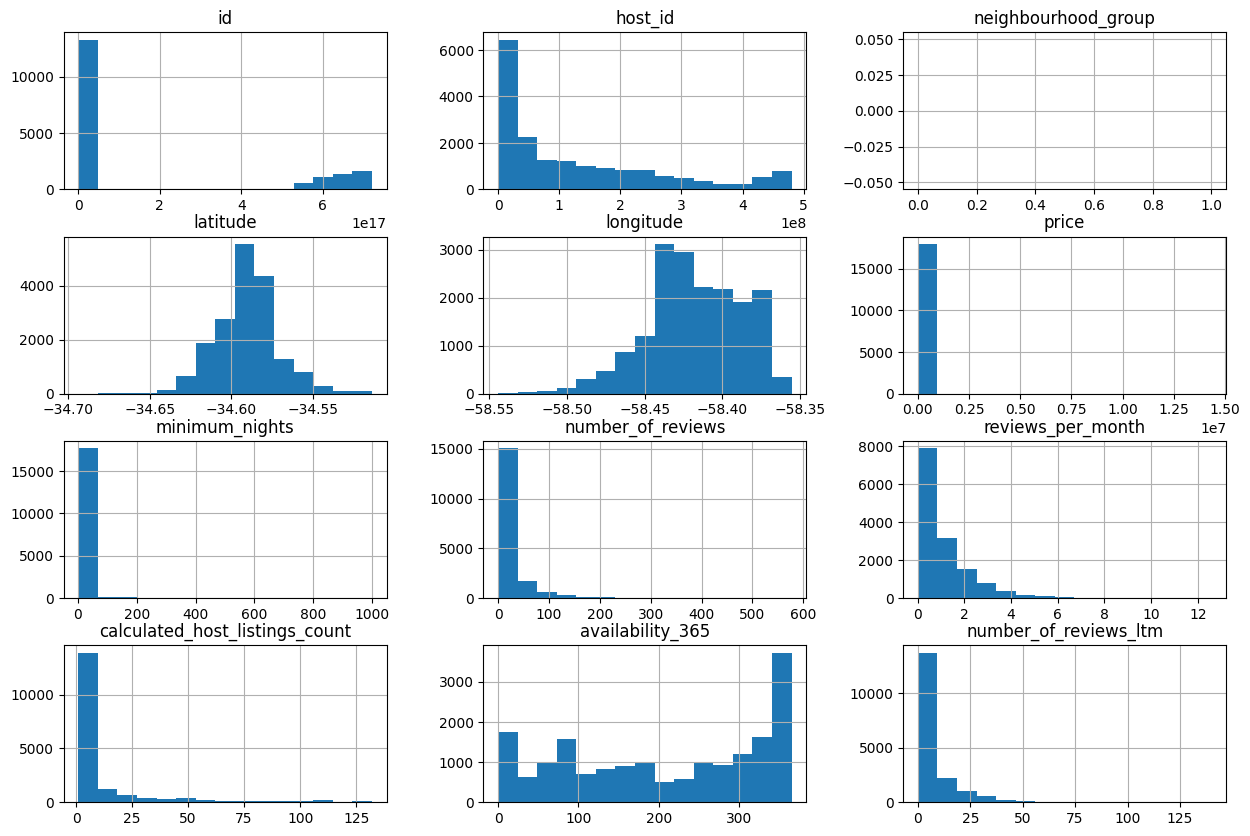

In [ ]:
# plotar o histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));


Antes de responder as próximas perguntas da análise, verificarei se há **outliers**. Pelo histograma já verificamos alguns outliers. Para confirmar utilizarei as seguintes análises:


*   Resumo estatístico por meio do método describe()
*   Plotar boxplots para a variável.



In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm
count,1.794700e+04,17947.000000,17947.000000,14140.000000,17947.000000,17947.000000
mean,1.130799e+04,7.682398,20.988800,1.075231,11.396055,6.745696
std,1.549916e+05,27.965044,37.816027,1.174657,23.298279,10.809149
min,2.600000e+02,1.000000,0.000000,0.010000,1.000000,0.000000
25%,4.136000e+03,2.000000,1.000000,0.250000,1.000000,0.000000
50%,5.790000e+03,3.000000,6.000000,0.690000,2.000000,2.000000
75%,8.685000e+03,5.000000,24.000000,1.492500,8.000000,9.000000
max,1.433051e+07,1000.000000,577.000000,12.580000,132.000000,140.000000


A média da variável price é de 11307.99. Analisando o resumos estatístico acima, percebe-se que a variável price no terceiro quartil possui o valor abaixo de 11397.99 e o valor máximo é 1000000. O valor mínimo de noites está acima 999. Concluímos que são valores destoantes e que há uma interferência dos outliers.

**Boxplot para minimum_nights**

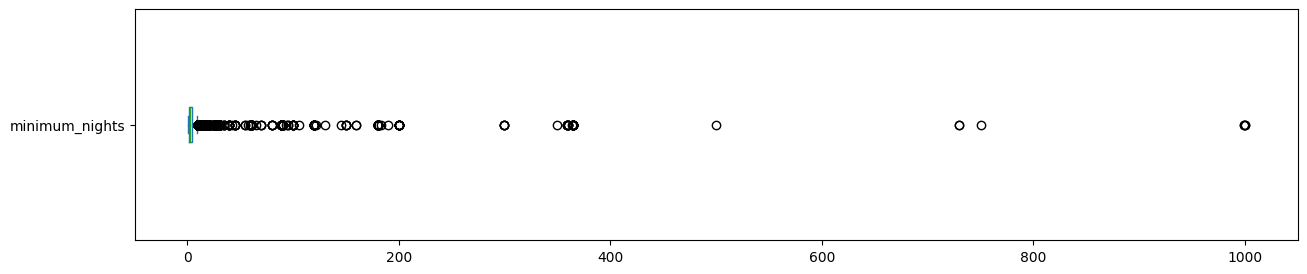

minimum_nights: valores acima de 30:
377 entradas
2.1006%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

**Boxplot para price**

Pegaremos o valor médio dos hotéis cinco estrelas de Buenos Aires.
Segundo o portal Trip Divisor, o primeiro hotel no ranking do portal tem a diária no valor de 112339 pesos argentinos. Com isso, utilizaremos valores acima de 112339.

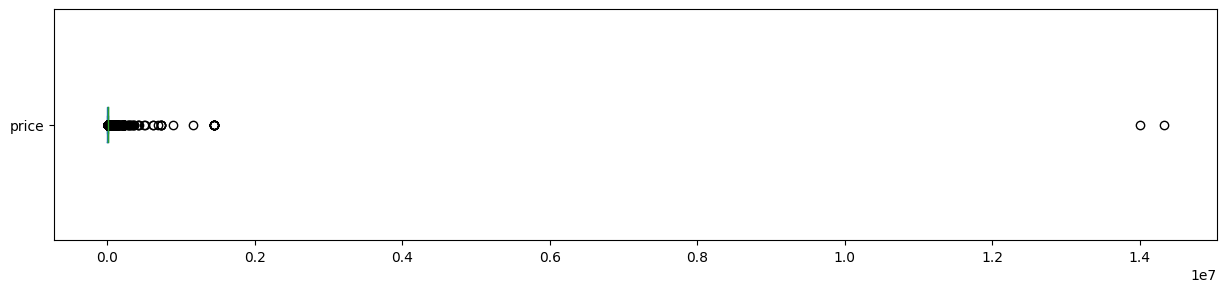


price: valores acima de 112339
82 entradas
0.4569%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 112339 para price
print("\nprice: valores acima de 112339")
print("{} entradas".format(len(df[df.price > 112339])))
print("{:.4f}%".format((len(df[df.price > 112339]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));


Com o gráfico de dispersão podemos ver onde tem mais ou menos valores.


In [ ]:
df.sort_values(by=['price'], inplace=True)
fig = px.scatter(df, y=df.price.sort_values(),
      color='price',
      labels={'y' : 'Preço (price)'})
fig.show()

**Histograma sem *outliers***

Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

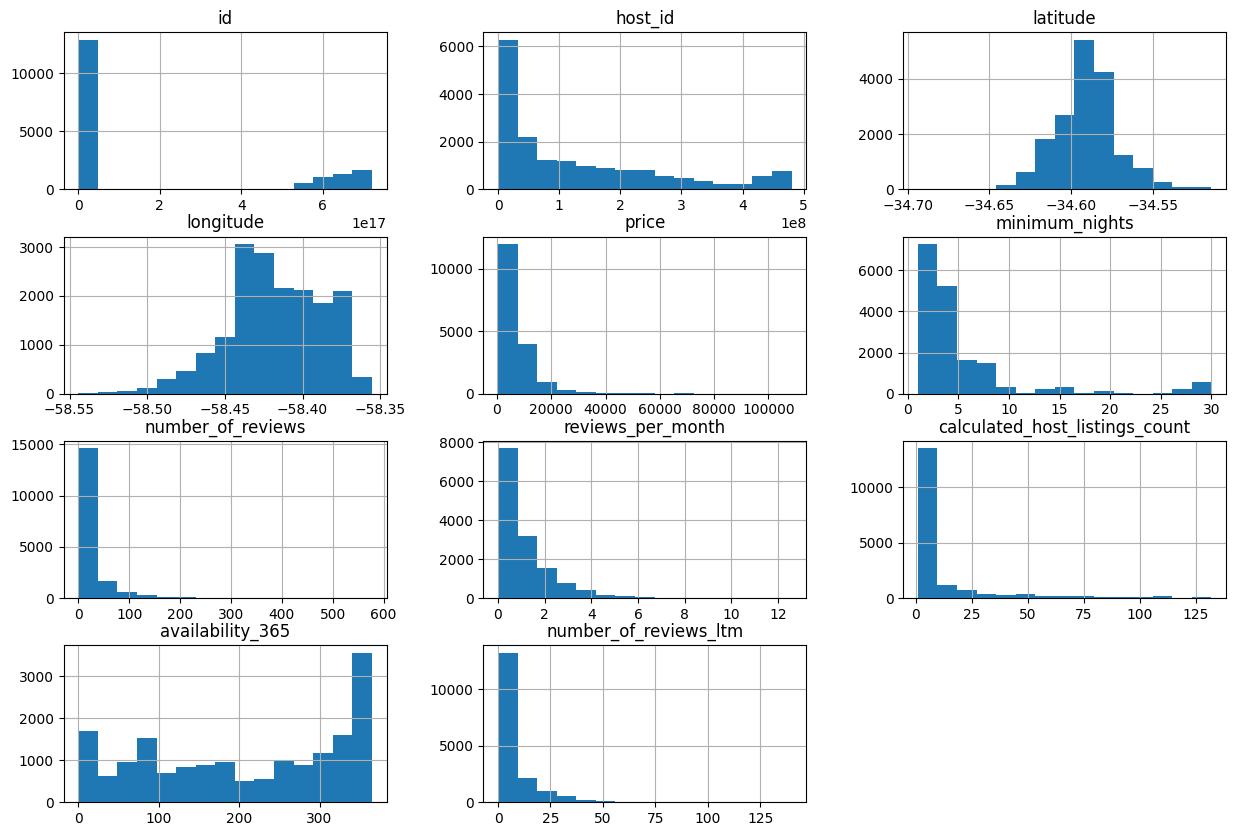

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 112339].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

Criar uma matriz de correlação
Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.030005,-0.055496,-0.074201,0.081179,0.080438
minimum_nights,-0.030005,1.000000,-0.099131,-0.222419,0.063165,-0.022965
number_of_reviews,-0.055496,-0.099131,1.000000,0.330857,-0.061034,-0.064946
reviews_per_month,-0.074201,-0.222419,0.330857,1.000000,0.064622,0.039297
calculated_host_listings_count,0.081179,0.063165,-0.061034,0.064622,1.000000,0.086978
availability_365,0.080438,-0.022965,-0.064946,0.039297,0.086978,1.000000


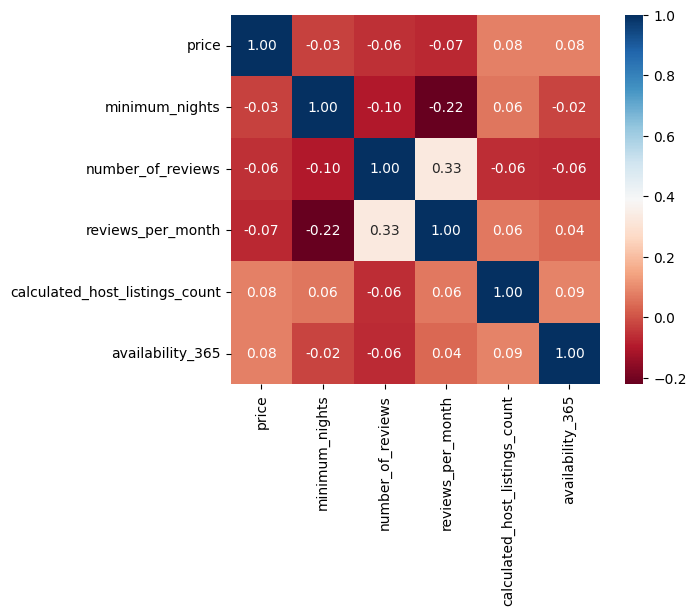

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    15233
Private room        1964
Shared room          189
Hotel room           112
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.870557
Private room       0.112241
Shared room        0.010801
Hotel room         0.006401
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Buenos Aires?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Dique 4          18592.833333
Dique 3          17450.666667
Puerto Madero    16529.068493
Floresta         14580.250000
Dique 2          14176.157895
Dique 1          13521.600000
Coghlan          10250.127273
Villa Real       10086.625000
Monte Castro      9337.500000
Palermo           9001.185964
Name: price, dtype: float64

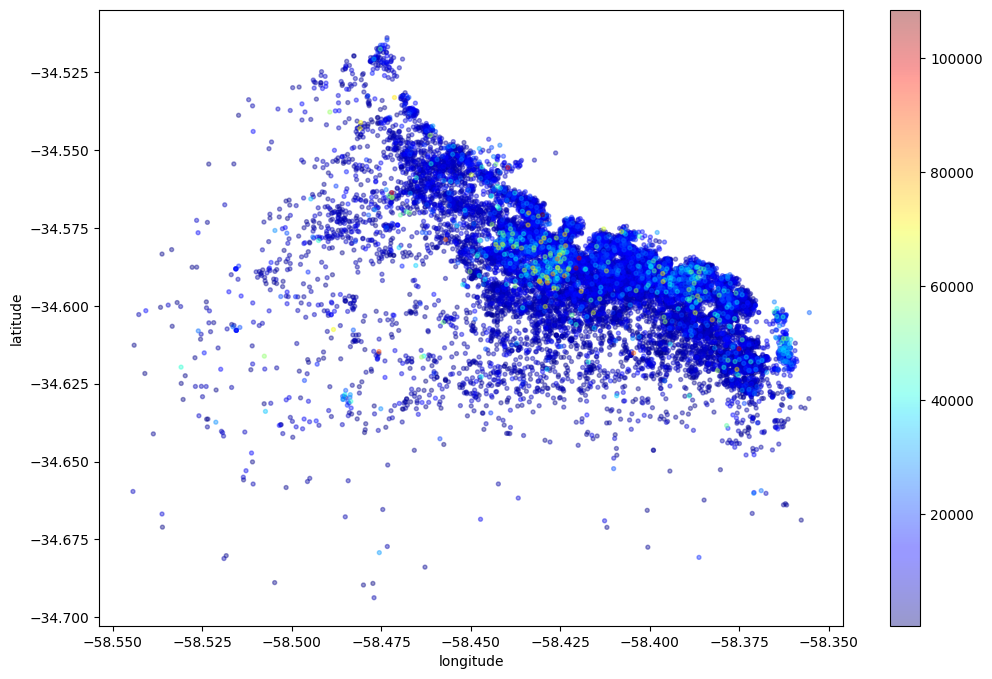

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

mean_minimum_nights = df_clean.minimum_nights.mean()

print(f"A média do mínimo de noites para aluguel é: {mean_minimum_nights}.")

A média do mínimo de noites para aluguel é: 4.917361984226769.


## Conclusões

Esta foi uma análise inicial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

Percebe-se que há uma concentração de imóveis disponíveis na região de cais de Buenos Aires, principalmente na região de Puerto Madero que é uma região nova, moderna, luxuosa, sendo assim, elevando o custo dos imóveis.